# Importing the data 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Company Attrition Data.csv")

# Viewing the data

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Sales_Occured', 'salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Sales_Occured          14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.values


array([[0.38, 0.53, 2, ..., 0, 'sales', 'low'],
       [0.8, 0.86, 5, ..., 0, 'sales', 'medium'],
       [0.11, 0.88, 7, ..., 0, 'sales', 'medium'],
       ...,
       [0.37, 0.53, 2, ..., 0, 'support', 'low'],
       [0.11, 0.96, 6, ..., 0, 'support', 'low'],
       [0.37, 0.52, 2, ..., 0, 'support', 'low']], dtype=object)

# Cleaning of the data

In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

# Performing EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")    
import os

<AxesSubplot:xlabel='satisfaction_level', ylabel='salary'>

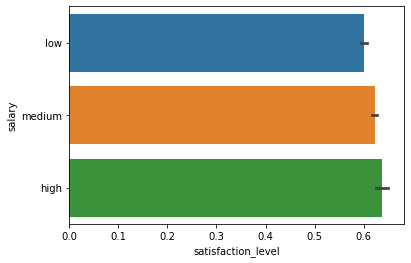

In [12]:
figsize = (40,40)
sns.barplot(x ='satisfaction_level',y='salary',data = df)

Conclusion : The employyes with high salary are having high satisfaction level in the company, the employees falling under this category have least chances of leaving the company


<AxesSubplot:xlabel='salary', ylabel='time_spend_company'>

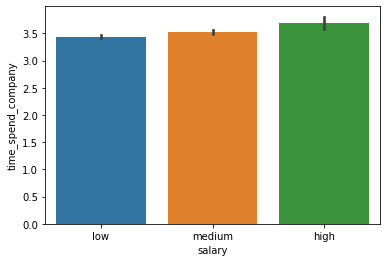

In [13]:
sns.barplot(x = 'salary',y='time_spend_company',data = df)

Conclusion: The employees with high salary have the most time spent in the company, they have high chances of leaving the company 


Text(0, 0.5, 'salary')

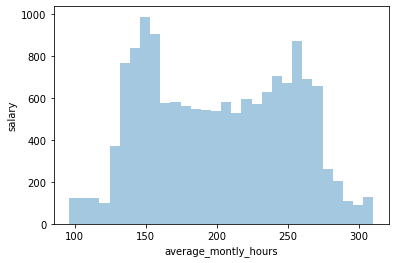

In [14]:
figsize=(40,40)
sns.distplot(df['average_montly_hours'], kde = False)
plt.ylabel('salary')

<AxesSubplot:>

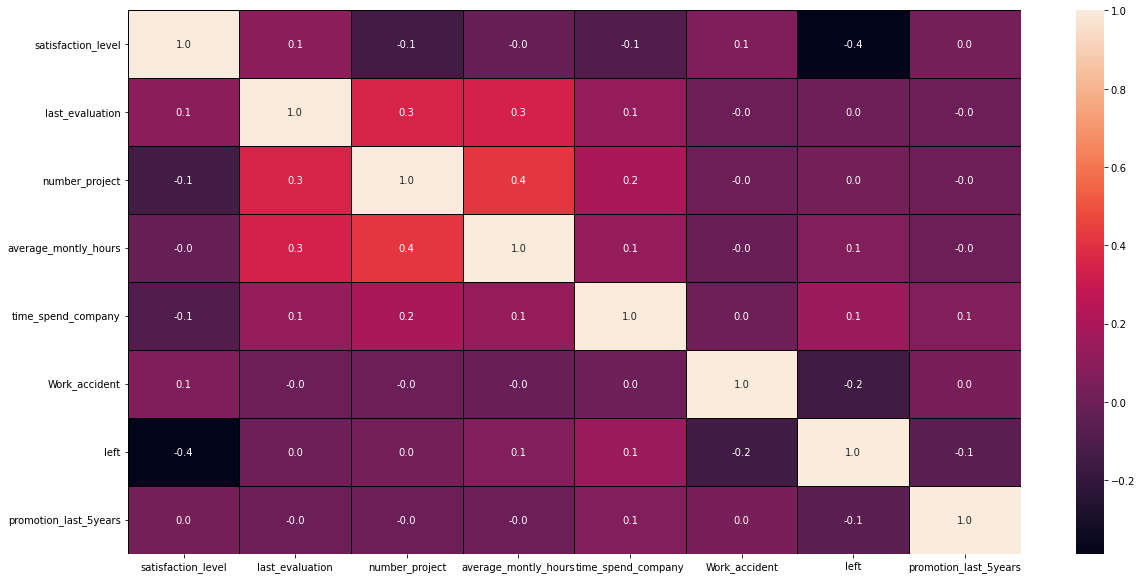

In [15]:
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)

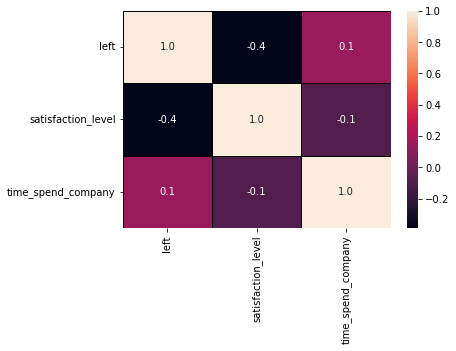

In [16]:
features=['left','satisfaction_level','time_spend_company']
sns.heatmap(df[features].corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f")
plt.show()

# Data preprocessing for model building


In [17]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

non_numeric_columns = df.select_dtypes(include=['object']).columns

X = df.drop('left', axis=1).drop(non_numeric_columns, axis=1)


label_encoder = LabelEncoder()
df['left'] = label_encoder.fit_transform(df['left'])
y = df['left']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("\nPreprocessed Dataset:")
print(X_train_scaled[:5])  
print(y_train[:5]) 



Preprocessed Dataset:
[[ 1.55539086 -0.61934644 -0.65341156 -0.2608872   0.34061666 -0.41100307
  -0.14998935]
 [-1.81839394  0.37200735  0.15695385 -0.10065248  1.02407141 -0.41100307
  -0.14998935]
 [ 0.75210876  0.48863721 -0.65341156 -0.52126862 -1.02629282 -0.41100307
  -0.14998935]
 [ 0.18981129  0.83852678  0.15695385 -1.78311702  1.70752615 -0.41100307
  -0.14998935]
 [-2.01921447  1.24673128  2.58805008  1.66192942  0.34061666 -0.41100307
  -0.14998935]]
9838    0
7689    0
6557    0
6872    0
820     1
Name: left, dtype: int64


In [18]:
df = pd.DataFrame(data=X_train_scaled, columns=X.columns)
df['left'] = y_train

# Display the preprocessed data
print("Preprocessed Dataset:")
print(df.head())

Preprocessed Dataset:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            1.555391        -0.619346       -0.653412             -0.260887   
1           -1.818394         0.372007        0.156954             -0.100652   
2            0.752109         0.488637       -0.653412             -0.521269   
3            0.189811         0.838527        0.156954             -1.783117   
4           -2.019214         1.246731        2.588050              1.661929   

   time_spend_company  Work_accident  promotion_last_5years  left  
0            0.340617      -0.411003              -0.149989   1.0  
1            1.024071      -0.411003              -0.149989   1.0  
2           -1.026293      -0.411003              -0.149989   1.0  
3            1.707526      -0.411003              -0.149989   NaN  
4            0.340617      -0.411003              -0.149989   1.0  


In [19]:
df.isnull().sum()

satisfaction_level          0
last_evaluation             0
number_project              0
average_montly_hours        0
time_spend_company          0
Work_accident               0
promotion_last_5years       0
left                     2427
dtype: int64

In [20]:
df['left'].fillna(-1, inplace=True)


In [21]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
left                     0
dtype: int64

# 1. Logistic Regression Model

In [22]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)


y_pred = log_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Logistic Regression Model:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Logistic Regression Model:
Accuracy: 0.756
Confusion Matrix:
 [[2107  187]
 [ 545  161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.46      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000



# 2. Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


y_pred_rf = rf_model.predict(X_test_scaled)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)


print("\nRandom Forest Model:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", classification_rep_rf)




Random Forest Model:
Accuracy: 0.9886666666666667
Confusion Matrix:
 [[2286    8]
 [  26  680]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



# 3. Support Vector Machine (SVM) model

In [25]:
# Train a Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the SVM model
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print results for the SVM model
print("\nSupport Vector Machine (SVM) Model:")
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", classification_rep_svm)



Support Vector Machine (SVM) Model:
Accuracy: 0.9613333333333334
Confusion Matrix:
 [[2252   42]
 [  74  632]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2294
           1       0.94      0.90      0.92       706

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



# 4. Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the Decision Tree model
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print results for the Decision Tree model
print("\nDecision Tree Model:")
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", classification_rep_dt)



Decision Tree Model:
Accuracy: 0.9763333333333334
Confusion Matrix:
 [[2248   46]
 [  25  681]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.94      0.96      0.95       706

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



# 5. KNN model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)


y_pred_knn = knn_model.predict(X_test_scaled)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("\nK-Nearest Neighbors (KNN) Model:")
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_rep_knn)



K-Nearest Neighbors (KNN) Model:
Accuracy: 0.963
Confusion Matrix:
 [[2249   45]
 [  66  640]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2294
           1       0.93      0.91      0.92       706

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



# 6. Gradient Boosting Classifier 

In [64]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)


accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print("\nGradient Boosting Model:")
print("Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", classification_rep_gb)



Gradient Boosting Model:
Accuracy: 0.9726666666666667
Confusion Matrix:
 [[2269   25]
 [  57  649]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2294
           1       0.96      0.92      0.94       706

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



# 7. Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


y_pred_linear = linear_model.predict(X_test_scaled)


mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


print("\nLinear Regression Model:")
print("Mean Squared Error:", mse_linear)
print("R^2 Score:", r2_linear)
print()



Linear Regression Model:
Mean Squared Error: 0.14844428365392026
R^2 Score: 0.1750875217742044



# 8. Ridge Regression Model

In [30]:
from sklearn.linear_model import Ridge

# Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the Ridge Regression model
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)



# Print results for the Ridge Regression model
print("\nRidge Regression Model:")
print("Mean Squared Error:", mse_ridge)
print("R^2 Score:", r2_ridge)




Ridge Regression Model:
Mean Squared Error: 0.14844409988527832
R^2 Score: 0.17508854298594867


# Saving the Random Forest Classifier model

In [ ]:
joblib.dump(rf_model, 'random_forest_model.joblib')

In [33]:
import pickle

In [39]:
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)